In [65]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [67]:
df = pd.read_csv('/content/BTC-USD.csv')
data = df.filter(['Close'])
print(data)
#plt.plot(data['Close'])

             Close
0       314.248993
1       315.032013
2       281.082001
3       264.195007
4       274.473999
...            ...
2453  47260.218750
2454  42843.800781
2455  40693.675781
2456  43574.507813
2457  44895.097656

[2458 rows x 1 columns]


In [68]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
len(scaled_data)

2458

In [69]:
prediction_days = 60
x_train = []
y_train = []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
x_train.shape

(2398, 60, 1)

In [ ]:
# # Build the LSTM Model
# # Tao no-ron
# model = Sequential() 
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# model.add(Dense(units = 1))
# # Compiling the RNN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# # Fitting the RNN to the Training set
# model.fit(x_train, y_train, epochs = 100, batch_size = 32)
# model.save('/content/Price_Close.h5')

In [70]:
df1 = pd.read_csv('/content/BTC_TEST.csv')
test_data=df1.filter(['Close'])
actual_prices = test_data['Close'].values
print("ACtual",actual_prices.shape)
total_dataset = pd.concat((data['Close'],test_data['Close']), axis = 0)
inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

ACtual (366,)


In [71]:
#Prediction on test data
x_test = []
for x in range(prediction_days, len(inputs)): 
  x_test.append(inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.models.load_model('/content/Price_Close.h5')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices.shape

(366, 1)

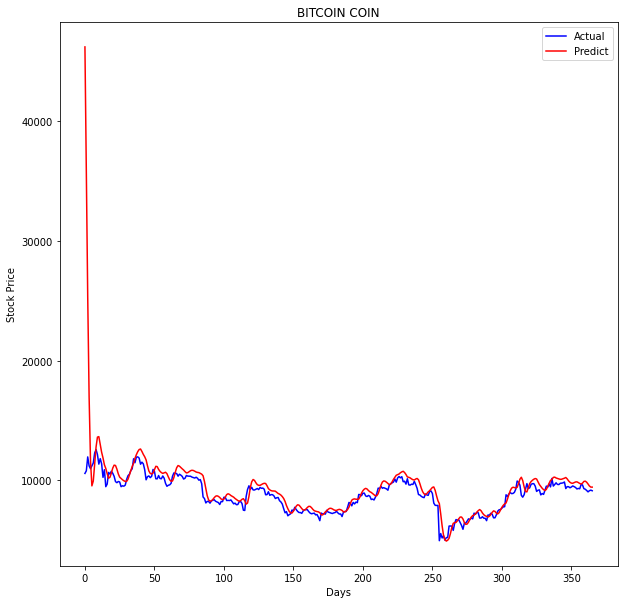

In [72]:
plt.figure(figsize=(10,10))
plt.title('BITCOIN COIN')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(actual_prices, color="blue")
plt.plot(predicted_prices, color="red")
plt.legend(['Actual', 'Predict'])
plt.show()

In [73]:
model = keras.models.load_model('/content/Price_Close.h5')

(366, 1)


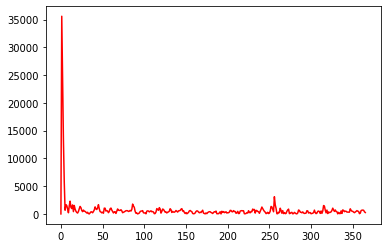

In [74]:
#Loss
y_predict = predicted_prices
y_actual = actual_prices
e = np.zeros((len(y_predict+1),1))
e_t = []
y_t = np.zeros((len(y_predict+1),1))
for i in range(1,len(y_predict)):
    e[i] = np.abs(y_actual[i-1]-y_predict[i-1])
    y_t[i] = y_predict[i-1] + 0.5*e[i-1] 
MAPE = np.abs((y_actual-y_predict))
# plt.plot(y_t,'green')
# plt.plot(y_actual,'red')
plt.plot(e,'red')
print(e.shape)
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

Sefl Prediction by Linear

In [76]:
def Linear(x_trend = [],y_trend = []):
  x_trend = x_trend.reshape(-1,1)
  y_trend = y_trend.reshape(-1,1)
  lrg = LinearRegression()
  lrg.fit(x_trend,y_trend)
  y_pred = lrg.predict(x)
  y_pred.shape
  wo = lrg.intercept_
  w1 = lrg.coef_
  #plt.plot(x,y_pred)
  #y_50 = x[50]*w1 + wo
  return w1,wo

Test Parameter

In [77]:
#Test
df1 = pd.read_csv('/content/BTC_TEST.csv').values
x = np.zeros((len(df1),1))
y = np.zeros((len(df1),1))
for i in range(0,len(df1)):
  x[i] = i;
  y[i] = predicted_prices[i,0]
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [78]:
a,b = Linear(x,y)
print(a)
print(b)

[[-9.46338846]]
[11134.21364047]


Separation of line prediction trend with batch size is 50

In [79]:
scale = int(len(df1)/50)
x = np.zeros((len(df1),1))
y = np.zeros((len(df1),1))
a = np.array(range(0,scale),dtype=float)
b = np.array(range(0,scale),dtype=float) #y=ax+b
print(scale)
for step in range(0,len(df1)):
  x[step] = step
  y[step] = predicted_prices[step,0]
for i in range(0,scale):
  a[i],b[i] = Linear(x[i*50:(i+1)*50,:],y[i*50:(i+1)*50,:])
print(a)
print(b)

7
[-181.98552732  -51.05998748   -5.97359867   13.39773318    9.98982471
    1.97389413   31.63880308]
[17269.37696232 13932.39244612  9570.47963646  5382.62662468
  7442.6529461   6439.13368883  -678.56757723]


Shown graphically

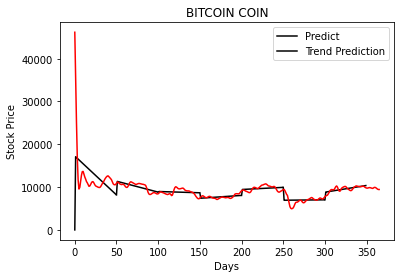

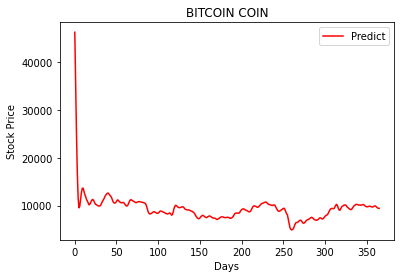

In [80]:
x_trend = np.array(range(0,len(df1)),dtype=float)
y_trend = np.array(y[:,0],dtype=float)
x_trend_predict = np.array(range(0,len(df1)),dtype=float)
y_trend_predict = np.array(range(0,len(df1)),dtype=float)
maxloop = 0
interval = 50
for step in range(0,scale):
  for i in range(0,interval):
    maxloop = maxloop + 1
    y_trend_predict[maxloop] = a[step]*x_trend[maxloop] + b[step]
  plt.plot(x_trend[step*interval:maxloop],y_trend_predict[step*interval:maxloop],color='black')
#Đồ thị có đường xu hướng
plt.title('BITCOIN COIN')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(predicted_prices, color="red")
plt.legend(['Predict','Trend Prediction'])
plt.show()
#Đồ thị không có đường xu hướng
plt.title('BITCOIN COIN')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(predicted_prices, color="red")
plt.legend(['Predict'])
plt.show()


In [81]:
#Test
df1 = pd.read_csv('/content/BTC_TEST.csv').values
x = np.zeros((len(df1),1))
y = np.zeros((len(df1),1))
for i in range(0,len(df1)):
  x[i] = i;
  y[i] = predicted_prices[i,0]
x = x.reshape(-1,1)
y = y.reshape(-1,1)

Predict trend direction from all data gaph

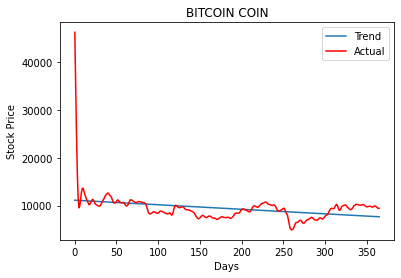

In [82]:
lrg = LinearRegression()
lrg.fit(x,y)
y_pred = lrg.predict(x)
y_pred.shape
wo = lrg.intercept_
w1 = lrg.coef_
plt.plot(x,y_pred)
plt.title('BITCOIN COIN')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(predicted_prices, color="red")
plt.legend(['Trend','Actual'])
plt.show()

In [83]:
predicted_prices.shape
trend_prices = np.array(range(0,len(predicted_prices)-1),dtype=int)
for i in range(0,len(predicted_prices)-1):
  if predicted_prices[i] < predicted_prices[i+1]:
    trend_prices[i] = 1 #Xu Hướng Tăng
  else:
    trend_prices[i] = 0 #Xu Hướng Giảm
trend_prices = trend_prices.reshape(-1,1)
print(trend_prices.shape)
# print(trend_prices[1])

(365, 1)


In [84]:
df2 = pd.read_csv('/content/BTC_TEST.csv')
Close_prices = df2.filter(['Close'])
Close_prices = Close_prices['Close']
Open_prices = df2.filter(['Open'])
Open_prices = Open_prices['Open']

##-----------------------------------------------------------------------------

###Create Input T/P for Predict

In [85]:
import random
state_size = np.zeros((len(df1),3))
state_size = np.array([state_size])
action_size = 3
x_train = []
y_train = []
Take_Profit = 0
a = np.array(range(0,len(df1)-1))
for x in range(0, len(df1)-1):
  Take_Profit += Close_prices[x] - Open_prices[x]
  x_train.append(Take_Profit)
print(Take_Profit)
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0],1))

-1612.1157349999758


In [86]:
class Envr():
  def __init__(self):
    self.episode = 10
    self.size_action = 3 # 1 2 3
    self.size_state = len(predicted_prices[:,0])
    self.size_data = 355
    self.lr = 0.001 #Learning rate
    self.gamma = 0.95 #Discount
    
    self.epsilon = 0.999
    self.epsilon_min = 0.01
    self.epsilon_decay = 0.999

    self.Open_prices = Open_prices[0]
    self.Close_prices = predicted_prices[:,0] #Close prices is predicted
    self.Close_prices_real = Close_prices
    self.q_t = np.zeros((self.size_state, self.size_action+1))
    self.q_table = np.random.uniform(low=-2, high=0, size=(self.size_state, self.size_action+1))

    # self.trend_prices = trend_prices
    self.trend_data = trend_prices
    self.Bought_prices = 0
    self.Sold_prices = []
    self.Profit = 0
    self.Stock = 0
    self.CRV = 100000
    self.Ns = self.CRV/self.Open_prices
    self.predict_data = predicted_prices

    self.model_state = model_state = Sequential()
  def model(self):
    q_a = np.random.randint(low=0, high=len(df1)-1, size=(len(df1), 3))
    for j in range(0,self.size_action):
      for i in range(0,len(q_a)-1):
        q_a[i,j] = i
    #----------------------------------------------------------------------------------
    #LSTM
    model_state = Sequential() 
    model_state.add(LSTM(units = 50, return_sequences = True, input_shape=x_train.shape))
    model_state.add(Dropout(0.2))
    model_state.add(LSTM(units = 240, return_sequences = True))
    model_state.add(Dropout(0.2))
    model_state.add(LSTM(units = 480, return_sequences = True))
    model_state.add(Dropout(0.2))
    model_state.add(LSTM(units = 50))
    model_state.add(Dropout(0.2))
    # Output layer
    model_state.add(Dense(action_size))
    model_state.compile(optimizer = 'adam', loss = 'mean_squared_error')
    #----------------------------------------------------------------------------------
  def action(self,state):
    if random.random() < self.epsilon:
      return random.randint(0,1)
    else:
      return np.argmax(state)
  def Get_State(self,t):
    return t+1
  def Initial_State(self):
    return 1
  def End_State(self,state):
    return self.size_state
  def Get_Ns(self):
    return self.Ns
  def Get_TP(self):
    return (0.5*(np.abs(self.Open_prices - self.Close_prices))*self.Ns)
  def check(self):
    print(self.Close_prices.shape)
    print(self.Open_prices.shape)
    print(self.size_state)
#Check parameter
Agent = Envr()
Agent.check()
a = np.array(range(0,100))
a = a.reshape(-1,1)
b = Agent.action(a)
# print(Agent.action(1))
# print(Agent.Get_State(2))
agent = Envr()
Ns = int(agent.Get_Ns()) # CRV = 100 dolars

(366,)
()
366


### DEFINE GRAPH FUNCTION

In [87]:
def Graph():
  k = 50
  action_0 = []
  action_1 = []
  trend_dec = []
  trend_inc = []
  x_trend_0 = []
  x_trend_1 = []
  x_action_0 = []
  x_action_1 = []
  plt.plot(max_profit_list,'black',label='Profit')
  plt.title('Profit/Loss')
  plt.xlabel('Days')
  plt.ylabel('Profit')
  for i in range(0,int(len(max_action_list)/k)):
    if max_action_list[i*k] == 0:
      x_action_0.append(i*k)
      action_0.append(max_profit_list[i*k])
      if agent.trend_data[i*k] == 0:
        x_trend_0.append(i*k)
        trend_dec.append(max_profit_list[i*k])
      elif agent.trend_data[i*k]== 1:
        x_trend_1.append(i*k)
        trend_inc.append(max_profit_list[i*k])
    elif max_action_list[i*k] == 1:
      x_action_1.append(i*k)
      action_1.append(max_profit_list[i*k])
      if agent.trend_data[i*k] == 0:
        x_trend_0.append(i*k)
        trend_dec.append(max_profit_list[i*k])
      elif agent.trend_data[i*k]== 1:
        x_trend_1.append(i*k)
        trend_inc.append(max_profit_list[i*k])
  plt.plot(x_trend_1,trend_inc,'g|',label = 'Increase')
  plt.plot(x_trend_0,trend_dec,'r|',label = 'Decrease')
  plt.plot(x_action_0,action_0,'g<',label = 'Buy')
  plt.plot(x_action_1,action_1,'r>',label = 'Sell')
  plt.legend(loc='best')
  plt.show()

###IDEAL MODEL FROM REAL DATA

In [88]:
trend_prices = []
for i in range(0,len(predicted_prices)-1):
  if Close_prices[i] < Close_prices[i+1]:
    trend_prices.append(1)#Xu Hướng Tăng
  else:
    trend_prices.append(0) #Xu Hướng Giảm
trend_prices = np.array(trend_prices)
print(trend_prices)

[1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0]


In [89]:
def Get_action(t):
  # if agent.trend_data[t] == 1: #Xu hướng tăng
  if trend_prices[t] == 1: #Xu hướng tăng
    return 0 #Buy
  # if agent.trend_data[t] == 0: #Xu hướng giảm
  if trend_prices[t] == 0: #Xu hướng giảm
    return 1 #Sell

In [91]:
action_list = []
action = 0
TP = 0
Bought_prices = 0
Sold_prices = []
size_state = len(predicted_prices[:,0])
Close_prices_real = Close_prices
Close_predict = predicted_prices
for i in range(0,size_state-1):
  action = Get_action(i)
  if action == 0: #Buy
    if len(Sold_prices) == 0: #Buy
      Sold_prices.append(Close_predict[i]) # Open prices
      # print("[{}]--------------------------".format(i))
      # print(".Buy : {}".format(Open_prices[i]))
      # print(" -. Trend Line : {}".format("Increase" if agent.trend_data[i] == 1 else "Decrease"))
  if action == 1: #Sell
    if len(Sold_prices) == 1: #Sell
      Bought_prices = Sold_prices.pop(0)
      if Close_prices_real[i] > Bought_prices:
        TP += np.abs((Close_prices_real[i] - Bought_prices)*Ns-(0.19/100)*2*(Close_prices_real[i] - Bought_prices)*Ns)
        # print("[{}]--------------------------".format(i))
        # print(".Sell : {}".format(Bought_prices))
        # print(" -. Take/Profit of Index {}: {}" .format(i,np.abs((agent.Close_prices_real[i] - Bought_prices)*Ns)))
        # print(" -. Trend Line : {}".format("Increase" if agent.trend_data[i] == 1 else "Decrease"))
      # else:
      #   Sold_prices.append(Bought_prices)
  action_list.append(action)
action_list = np.array(action_list)
# print("Action list: ",action_list)
print("Total of Profit:", TP)

Total of Profit: [126725.91]


###EVALUTE FUNCTION

In [92]:
def Drawdown(Pmax, Pt, Length_P):
  Draw_down = []
  MDD = 0
  for i in range(0,Length_P):
    Draw_down.append(((Pmax-np.abs(Pt[i]))/Pmax)*100)
  Draw_down = np.array(Draw_down)
  MDD = max(Draw_down)
  return MDD
def Accuracy(max_ideal_profit, max_model_profit):
  Acc = (max_model_profit/max_ideal_profit)*100
  return np.round(Acc,2)
def Average_day(Value_now, Value_previous):
  Daily_return = ((Value_now - Value_previous)/Value_previous)*100
  return np.round(Daily_return,2)
def Accumulated_return(Current_invest, Initial_invest):
  return ((Current_invest-Initial_invest)/Initial_invest)*100

REF of MDP: https://python-data-science.readthedocs.io/en/latest/reinforcement.html

In [93]:
print(Open_prices)

0      10796.930664
1      10588.683594
2      10818.156250
3      11972.718750
4      11203.102539
           ...     
361     9260.995117
362     9167.824219
363     9048.460938
364     9140.029297
365     9185.581055
Name: Open, Length: 366, dtype: float64


In [148]:
agent = Envr()
Ns = int(agent.Get_Ns()) # CRV = 100 dolars
print("Initial Investment : {} Stocks and {}$".format(Ns,agent.CRV))

Initial Investment : 9 Stocks and 100000$


###0. Predict Stock Prices Base on Trend Line ( Extend )

In [149]:
#
q_table = np.random.uniform(low=-2, high=0, size=(agent.size_state, agent.size_action))
agent.q_t = q_table
reward = 0
total_episodes = 4000
learning_rate = agent.lr                  
gamma = agent.gamma                  
             
Close_predict = predicted_prices[:,0]
total_profit = 0

agent.epsilon = 0.99
agent.epsilon_min = 0.01
agent.epsilon_decay = 0.999

Highest_profit = 0
list_profit_t = [] # --flag
max_action_list = []
max_profit_list = []
max_reward = 0
max_profit = 0
max_episode = 0
Thredshold = 0.1
for episode in range(total_episodes):
  action_list = []
  profit_list = []
  agent.Sold_prices = []
  state = 0
  step = 0
  reward = 0
  total_profit = 0
  Highest_profit_temp = 0
  agent.Profit = 0
  done = False
  print(".Episode [{}]-----------------------" .format(episode))

  for step in range(0,agent.size_state-1):
    agent.q_t[state,:] = q_table[state,:]
    action = agent.action(q_table[state,:])
    next_state = agent.Get_State(step)

    if agent.trend_data[step] == 1 : #Trend Tăng
      if action == 0: #Buy
        if len(agent.Sold_prices) == 0:
          agent.Sold_prices.append(Close_predict[step]) # Close_prices
          # print(".Day [{}]---------------------------".format(step))
          # print("Buy :",Close_predict[step])
          # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
          # print("-----------------------------------------------------------------")

      if action == 1: #Sell
        if agent.Close_prices[step] > Open_prices[step]: #fix
          if len(agent.Sold_prices) == 1:
            agent.Bought_prices = agent.Sold_prices.pop(0)
            if agent.Close_prices_real[step] > agent.Bought_prices:
              agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
            reward = max((agent.Close_prices_real[step] - agent.Bought_prices)*Ns,0)
              # print(".Day [{}]---------------------------".format(step))
              # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,agent.Close_prices_real[step],agent.Bought_prices,Ns,(agent.Close_prices_real[step] - agent.Bought_prices)*Ns))
              # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
              # print("-----------------------------------------------------------------")
          # elif agent.Close_prices[step] < Open_prices[step]: #Hold
          #   action = 2

    elif agent.trend_data[step] == 0: #Trend Giảm
      if action == 0: #Buy
          if Close_predict[step] > Open_prices[step]:
            if len(agent.Sold_prices) == 0:
              agent.Sold_prices.append(Close_predict[step]) # Close_prices
              # print(".Day [{}]---------------------------".format(step))
              # print("Buy :",Close_predict[step])
              # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
              # print("-----------------------------------------------------------------")
          # elif Close_predict[step] < Open_prices[step]: #Hold
          #   action = 2

      if action == 1: #Sell
        if len(agent.Sold_prices) == 1: #Sell
          agent.Bought_prices = agent.Sold_prices.pop(0)
          if agent.Close_prices_real[step] > agent.Bought_prices:
            agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
          reward = max((agent.Close_prices_real[step] - agent.Bought_prices)*Ns,0)
            # print(".Day [{}]---------------------------".format(step))
            # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,agent.Close_prices_real[step],agent.Bought_prices,Ns,(agent.Close_prices_real[step] - agent.Bought_prices)*Ns))
            # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
            # print("-----------------------------------------------------------------")
    q_table[state,action] = q_table[state,action] + agent.lr*(reward + agent.gamma*np.max(q_table[next_state,:]) - q_table[state,action])

    state = next_state    
    profit_list.append(agent.Profit)
    action_list.append(action)
    
    if Highest_profit_temp < agent.Profit:
      Highest_profit_temp = agent.Profit

    done = True if step == (len(predicted_prices)-2) else False
    if done:
      while len(agent.Sold_prices) > 0:
        agent.Bought_prices = agent.Sold_prices.pop(0)
        if agent.Close_prices_real[step] > agent.Bought_prices:
          agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
          # print(".Day [{}]---------------------------".format(step))
          # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,Open_prices[step],agent.Bought_prices,Ns,(agent.Close_prices_real[step] - agent.Bought_prices)*Ns))
        break      
      if agent.Profit > max_profit: 
        max_profit = agent.Profit
        max_action_list = action_list
        max_profit_list = profit_list
        Highest_profit = Highest_profit_temp
        max_episode = episode
      list_profit_t.append(agent.Profit) # --flag
      temp_list_profit_t = np.array(list_profit_t)
      Length_temp = len(temp_list_profit_t)
      print(" .Total Profit: {} ----- .AVG Daily Return: {}% ----- .Accumulated Return: {}%".format(round(agent.Profit,2), Average_day(temp_list_profit_t[Length_temp-1],temp_list_profit_t[Length_temp-2]),np.round(Accumulated_return(agent.Profit/agent.Open_prices+Ns,Ns),2)))
      print(" .Epsilon :",agent.epsilon)
    # if agent.epsilon < Thredshold:
    #   agent.epsilon = 0.99
  if agent.epsilon > agent.epsilon_min:
    agent.epsilon *= agent.epsilon_decay

print("Max profit in each episode: ", list_profit_t) # --flag
print(".Total of Profit in entire transition",max_profit)
print(".The Highest episode gain: {}".format(max_episode))
print(".Highest Profit in each transition :", Highest_profit)
print(".Max_action_list :", max_action_list)
print(".List Profit of Max :",max_profit_list)
print("....Initial Investment : {}".format(agent.CRV))
print("....After Investment : {}".format(max_profit+Ns))
print("Increase/Decrease by percentage : {}".format(((max_profit/agent.Open_prices)/Ns)*100))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 .Total Profit: 26600.31 ----- .AVG Daily Return: -52.07% ----- .Accumulated Return: 27.37%
 .Epsilon : 0.09563474198046598
.Episode [2337]-----------------------
 .Total Profit: 27380.21 ----- .AVG Daily Return: 2.93% ----- .Accumulated Return: 28.18%
 .Epsilon : 0.09553910723848552
.Episode [2338]-----------------------
 .Total Profit: 24087.76 ----- .AVG Daily Return: -12.02% ----- .Accumulated Return: 24.79%
 .Epsilon : 0.09544356813124703
.Episode [2339]-----------------------
 .Total Profit: 30975.68 ----- .AVG Daily Return: 28.6% ----- .Accumulated Return: 31.88%
 .Epsilon : 0.09534812456311578
.Episode [2340]-----------------------
 .Total Profit: 42492.49 ----- .AVG Daily Return: 37.18% ----- .Accumulated Return: 43.73%
 .Epsilon : 0.09525277643855266
.Episode [2341]-----------------------
 .Total Profit: 45800.53 ----- .AVG Daily Return: 7.78% ----- .Accumulated Return: 47.13%
 .Epsilon : 0.09515752366211411
.Episode [2

###GRAPH

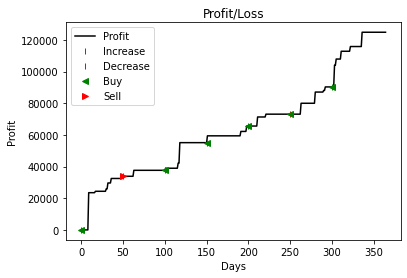

In [150]:
Graph()

###Accuracy of profit between IDEAL and MDP

In [151]:
print("Accuracy of Profit: {}%".format(Accuracy(TP,max_profit)))

Accuracy of Profit: [98.48]%


###Drawdown of profit over processing of model above

In [152]:
Pmax = max_profit
Pt = np.array(list_profit_t)
print("Drawdown of entire profit over processing: {}%".format(np.round(Drawdown(Pmax,Pt,len(Pt)),2)))

Drawdown of entire profit over processing: 85.39%


###Accumulated Return of highest investment

In [153]:
Accumulated = np.round(Accumulated_return(max_profit/agent.Open_prices+Ns,Ns),2)
print("Accumulated Return: {}%".format(Accumulated))

Accumulated Return: 128.43%


###---------------------------------------------------

###1. Predict Stock Price with Sell/Buy( Random )

In [195]:
agent1 = Envr()
agent = agent1

In [196]:
#
q_table = np.random.uniform(low=-2, high=0, size=(agent.size_state, agent.size_action))
agent.q_t = q_table
reward = 0
total_episodes = 4000
learning_rate = agent.lr                  
gamma = agent.gamma                  
             
Close_predict = predicted_prices[:,0]
total_profit = 0

agent.epsilon = 0.9
agent.epsilon_min = 0.01
agent.epsilon_decay = 0.99
Thredshold = 0.1

Highest_profit = 0
list_profit_t = [] 
max_action_list = []
max_profit_list = []
max_reward = 0
max_profit = -99999999999999999999
max_episode = 0
for episode in range(total_episodes):
  action_list = []
  profit_list = []
  agent.Sold_prices = []
  state = 0
  step = 0
  reward = 0
  total_profit = 0
  Highest_profit_temp = 0
  agent.Profit = 0
  done = False
  print(".Episode [{}]-----------------------" .format(episode))

  for step in range(0,agent.size_state-1):
    agent.q_t[state,:] = q_table[state,:]
    action = agent.action(q_table[state,:])
    next_state = agent.Get_State(step)

    if action == 0 and len(agent.Sold_prices) == 0: #Buy, Trend Tăng
      agent.Sold_prices.append(Close_predict[step]) # Close_prices
      # print(".Day [{}]---------------------------".format(step))
      # print("Buy :",Close_predict[step])
      # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
      # print("-----------------------------------------------------------------")
    
    if action == 1 and len(agent.Sold_prices) == 1: #Sell Trend Giảm
      agent.Bought_prices = agent.Sold_prices.pop(0)
      agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
      reward = max((agent.Close_prices_real[step] - agent.Bought_prices)*Ns,0)
      # print(".Day [{}]---------------------------".format(step))
      # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,agent.Close_prices_real[step],agent.Bought_prices,Ns,(agent.Close_prices_real[step] - agent.Bought_prices)*Ns))
      # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
      # print("-----------------------------------------------------------------")
    
    q_table[state,action] = q_table[state,action] + agent.lr*(reward + agent.gamma*np.max(q_table[next_state,:]) - q_table[state,action])

    state = next_state    
    profit_list.append(agent.Profit)
    action_list.append(action)
    
    if Highest_profit_temp < agent.Profit:
      Highest_profit_temp = agent.Profit

    done = True if step == (len(predicted_prices)-2) else False
    if done:
      while len(agent.Sold_prices) > 0:
        agent.Bought_prices = agent.Sold_prices.pop(0)
        if agent.Close_prices_real[step] > agent.Bought_prices:
          agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
        # print(".Day [{}]---------------------------".format(step))
        # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,Open_prices[step],agent.Bought_prices,Ns,(Open_prices[step] - agent.Bought_prices)*Ns))
        break
      if agent.Profit > max_profit: 
        max_profit = agent.Profit
        max_action_list = action_list
        max_profit_list = profit_list
        Highest_profit = Highest_profit_temp
        max_episode = episode
      list_profit_t.append(agent.Profit)
      temp_list_profit_t = np.array(list_profit_t)
      Length_temp = len(temp_list_profit_t)
      print(" .Total Profit: {} ----- .AVG Daily Return: {}% ----- .Accumulated Return: {}%".format(agent.Profit, Average_day(temp_list_profit_t[Length_temp-1],temp_list_profit_t[Length_temp-2]),np.round(Accumulated_return(agent.Profit/agent.Open_prices+Ns,Ns),2)))
      print(" .Epsilon :",agent.epsilon)
    # if agent.epsilon < Thredshold:
    #   agent.epsilon = 0.99
  if agent.epsilon > agent.epsilon_min:
    agent.epsilon *= agent.epsilon_decay

print("Max profit in each episode: ", list_profit_t) 
print(".Total of Profit in entire transition",max_profit)
print(".The Highest episode gain: {}".format(max_episode))
print(".Highest Profit in each transition :", Highest_profit)
print(".Max_action_list :", max_action_list)
print(".List Profit of Max :",max_profit_list)
print("....Initial Investment : {}".format(agent.CRV))
print("....After Investment : {}".format(max_profit+Ns))
print("Increase/Decrease by percentage : {}".format(((max_profit/agent.Open_prices)/Ns)*100))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 .Total Profit: -350790.65331299993 ----- .AVG Daily Return: -1.16% ----- .Accumulated Return: -361.0%
 .Epsilon : 0.009972629605030188
.Episode [2337]-----------------------
 .Total Profit: -353072.6015512499 ----- .AVG Daily Return: 0.65% ----- .Accumulated Return: -363.35%
 .Epsilon : 0.009972629605030188
.Episode [2338]-----------------------
 .Total Profit: -361622.76414412487 ----- .AVG Daily Return: 2.42% ----- .Accumulated Return: -372.15%
 .Epsilon : 0.009972629605030188
.Episode [2339]-----------------------
 .Total Profit: -367968.1948166249 ----- .AVG Daily Return: 1.75% ----- .Accumulated Return: -378.68%
 .Epsilon : 0.009972629605030188
.Episode [2340]-----------------------
 .Total Profit: -348858.31640399987 ----- .AVG Daily Return: -5.19% ----- .Accumulated Return: -359.01%
 .Epsilon : 0.009972629605030188
.Episode [2341]-----------------------
 .Total Profit: -354743.82860737486 ----- .AVG Daily Return: 1.69% --

###GRAPH

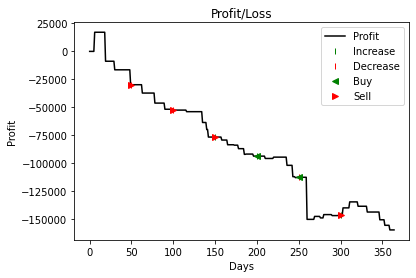

In [197]:
Graph()

###Accuracy of profit between IDEAL and MDP

In [198]:
print("Accuracy of Profit: {}%".format(Accuracy(TP,max_profit)))

Accuracy of Profit: [-126.24]%


###Drawdown of profit over processing of model above

In [199]:
Pmax = max_profit
Pt = np.array(list_profit_t)
print("Drawdown of entire profit over processing: {}%".format(np.round(Drawdown(Pmax,Pt,len(Pt)),2)))

Drawdown of entire profit over processing: 568.26%


###Accumulated Return of highest investment

In [200]:
Accumulated = np.round(Accumulated_return(max_profit/agent.Open_prices+Ns,Ns),2)
print("Accumulated Return: {}%".format(Accumulated))

Accumulated Return: -164.63%


###----------------------------------------------------------------------------

###2. Predict Stock Prices Buy/Sell Base on Trend (Not extend)

In [201]:
agent2 = Envr()
agent = agent2

In [202]:
#
q_table = np.random.uniform(low=-2, high=0, size=(agent.size_state, agent.size_action))
agent.q_t = q_table
reward = 0
total_episodes = 4000
learning_rate = agent.lr                  
gamma = agent.gamma                  
             
Close_predict = predicted_prices[:,0]
total_profit = 0

agent.epsilon = 0.9
agent.epsilon_min = 0.01
agent.epsilon_decay = 0.99
Thredshold = 0.1

Highest_profit = 0
list_profit_t = []
max_action_list = []
max_profit_list = []
max_reward = 0
max_profit = 0
max_episode = 0
max_episode = 0
for episode in range(total_episodes):
  action_list = []
  profit_list = []
  agent.Sold_prices = []
  state = 0
  step = 0
  reward = 0
  total_profit = 0
  Highest_profit_temp = 0
  agent.Profit = 0
  done = False
  print(".Episode [{}]-----------------------" .format(episode))

  for step in range(0,agent.size_state-1):
    agent.q_t[state,:] = q_table[state,:]
    action = agent.action(q_table[state,:])
    next_state = agent.Get_State(step)

    if agent.trend_data[step] == 1 :
      if action == 0:
        if len(agent.Sold_prices) == 0: #Buy, Trend Tăng
          agent.Sold_prices.append(Close_predict[step]) # Close_prices
          # print(".Day [{}]---------------------------".format(step))
          # print("Buy :",Close_predict[step])
          # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
          # print("-----------------------------------------------------------------")

    elif agent.trend_data[step] == 0:
      if action == 1:
        if len(agent.Sold_prices) == 1: #Sell Trend Giảm
          agent.Bought_prices = agent.Sold_prices.pop(0)
          if agent.Close_prices_real[step] > agent.Bought_prices:
            agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
            reward = max((agent.Close_prices_real[step] - agent.Bought_prices)*Ns,0)
            # print(".Day [{}]---------------------------".format(step))
            # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,agent.Close_prices_real[step],agent.Bought_prices,Ns,(agent.Close_prices_real[step] - agent.Bought_prices)*Ns))
            # print(" _.Trend Line : {}".format("Increase" if agent.trend_data[step] == 1 else "Decrease"))
            # print("-----------------------------------------------------------------")
          # else:
          #   agent.Sold_prices.append(agent.Bought_prices)

    q_table[state,action] = q_table[state,action] + agent.lr*(reward + agent.gamma*np.max(q_table[next_state,:]) - q_table[state,action])

    state = next_state    
    profit_list.append(agent.Profit)
    action_list.append(action)
    
    if Highest_profit_temp < agent.Profit:
      Highest_profit_temp = agent.Profit

    done = True if step == (len(predicted_prices)-2) else False
    if done:
      while len(agent.Sold_prices) > 0:
        agent.Bought_prices = agent.Sold_prices.pop(0)
        if agent.Close_prices_real[step] > agent.Bought_prices:
          agent.Profit += (agent.Close_prices_real[step] - agent.Bought_prices)*Ns
          # print(".Day [{}]---------------------------".format(step))
          # print(" .Sell: {} | Profit: ({} - {})*{} = {}".format(agent.Bought_prices,Open_prices[step],agent.Bought_prices,Ns,(Open_prices[step] - agent.Bought_prices)*Ns))
        break
      if agent.Profit > max_profit: 
        max_profit = agent.Profit
        max_action_list = action_list
        max_profit_list = profit_list
        Highest_profit = Highest_profit_temp
        max_episode = episode
      list_profit_t.append(agent.Profit)
      temp_list_profit_t = np.array(list_profit_t)
      Length_temp = len(temp_list_profit_t)
      print(" .Total Profit: {} ----- .AVG Daily Return: {}% ----- .Accumulated Return: {}%".format(agent.Profit, Average_day(temp_list_profit_t[Length_temp-1],temp_list_profit_t[Length_temp-2]),np.round(Accumulated_return(agent.Profit/agent.Open_prices+Ns,Ns),2)))
      print(" .Epsilon :",agent.epsilon)
    # if agent.epsilon < Thredshold:
    #   agent.epsilon = 0.99
  if agent.epsilon > agent.epsilon_min:
    agent.epsilon = agent.epsilon * agent.epsilon_decay

print("Max profit in each episode: ", list_profit_t)
print(".Total of Profit in entire transition",max_profit)
print(".The Highest episode gain: {}".format(max_episode))
print(".Highest Profit in each transition :", Highest_profit)
print(".Max_action_list :", max_action_list)
print(".List Profit of Max :",max_profit_list)
print("....Initial Investment : {}".format(agent.CRV))
print("....After Investment : {}".format(max_profit+Ns))
print("Increase/Decrease by percentage : {}".format(((max_profit/agent.Open_prices)/Ns)*100))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 .Total Profit: 92593.7050933125 ----- .AVG Daily Return: 0.0% ----- .Accumulated Return: 95.29%
 .Epsilon : 0.009972629605030188
.Episode [2337]-----------------------
 .Total Profit: 90567.905288625 ----- .AVG Daily Return: -2.19% ----- .Accumulated Return: 93.2%
 .Epsilon : 0.009972629605030188
.Episode [2338]-----------------------
 .Total Profit: 92593.7050933125 ----- .AVG Daily Return: 2.24% ----- .Accumulated Return: 95.29%
 .Epsilon : 0.009972629605030188
.Episode [2339]-----------------------
 .Total Profit: 92593.7050933125 ----- .AVG Daily Return: 0.0% ----- .Accumulated Return: 95.29%
 .Epsilon : 0.009972629605030188
.Episode [2340]-----------------------
 .Total Profit: 92593.7050933125 ----- .AVG Daily Return: 0.0% ----- .Accumulated Return: 95.29%
 .Epsilon : 0.009972629605030188
.Episode [2341]-----------------------
 .Total Profit: 92593.7050933125 ----- .AVG Daily Return: 0.0% ----- .Accumulated Return: 95.29%


###GRAPH

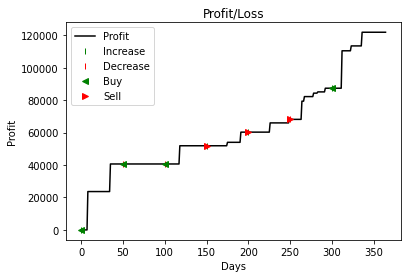

In [203]:
Graph()

###Accuracy of profit between IDEAL and MDP

In [204]:
print("Accuracy of Profit: {}%".format(Accuracy(TP,max_profit)))

Accuracy of Profit: [96.19]%


###Drawdown of profit over processing of model above

In [205]:
Pmax = max_profit
Pt = np.array(list_profit_t)
print("Drawdown of entire profit over processing: {}%".format(np.round(Drawdown(Pmax,Pt,len(Pt)),2)))

Drawdown of entire profit over processing: 53.42%


###Accumulated Return of highest investment

In [206]:
Accumulated = np.round(Accumulated_return(max_profit/agent.Open_prices+Ns,Ns),2)
print("Accumulated Return: {}%".format(Accumulated))

Accumulated Return: 125.44%
